In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
loans = pd.read_csv('loan.csv' , low_memory=False)
loans.shape

(39717, 111)

### Data Understanding

In [3]:
#Checking the row count
loans.count()

id                            39717
member_id                     39717
loan_amnt                     39717
funded_amnt                   39717
funded_amnt_inv               39717
                              ...  
tax_liens                     39678
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

In [4]:
#Checking the percentage of missing values
round(loans.isnull().sum()/len(loans) * 100,2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [5]:
# Removing columns with more than 50% of missing values
loans.dropna(axis=1,thresh=19859,inplace=True)

In [6]:
loans.shape

(39717, 54)

In [7]:
#Checking unique values in each column
loans.nunique().sort_values(ascending=False)

id                            39717
member_id                     39717
url                           39717
total_pymnt                   37850
total_pymnt_inv               37518
total_rec_int                 35148
last_pymnt_amnt               34930
emp_title                     28820
desc                          26527
revol_bal                     21711
title                         19615
installment                   15383
funded_amnt_inv                8205
total_rec_prncp                7976
annual_inc                     5318
recoveries                     4040
dti                            2868
collection_recovery_fee        2616
total_rec_late_fee             1356
out_prncp_inv                  1138
out_prncp                      1137
revol_util                     1089
funded_amnt                    1041
loan_amnt                       885
zip_code                        823
earliest_cr_line                526
int_rate                        371
last_credit_pull_d          

In [8]:
#Removing columns which have only 1 unique value 
loans = loans.loc[:,loans.nunique()>1]

In [9]:
loans.nunique().sort_values(ascending=False)

id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
desc                       26527
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
last_credit_pull_d           106
last_pymnt_d                 101
total_acc                     82
issue_d   

# Data Cleaning

Cleaning variables which are useful in analysis but have special characters like '>,<,+' etc., Imputing missing values

In [10]:
# Dropping behavioral variables and variables unknown at the time of application
loans = loans.drop(['revol_util','revol_bal','delinq_2yrs','inq_last_6mths','earliest_cr_line','last_pymnt_d','last_pymnt_amnt','total_pymnt_inv','total_rec_prncp','total_rec_int'],axis=1)


In [11]:
#Converting variables into Number format
loans['term']=loans['term'].str.extract('(\d+)').astype(int)
loans['int_rate']=loans['int_rate'].str.extract('(\d+.\d+)').astype(float)
loans['emp_length']=loans['emp_length'].str.extract('(\d+)').astype(float)

In [12]:
#Missing values in 'emp_length'
round((loans['emp_length'].isnull().sum()/len(loans))*100,2)

2.71

In [13]:
#Imputing missing values of emp_length with average
loans['emp_length'].fillna(round(loans.emp_length.mean(),0),inplace=True)

In [14]:
#Dropping variables which are very descriptive, same as other variables & won't be useful in analysis
loans = loans.drop(['url','desc','emp_title','out_prncp','out_prncp_inv'],axis=1)

In [15]:
#Checking for outliers in Annual_inc, int_rate, dti variables

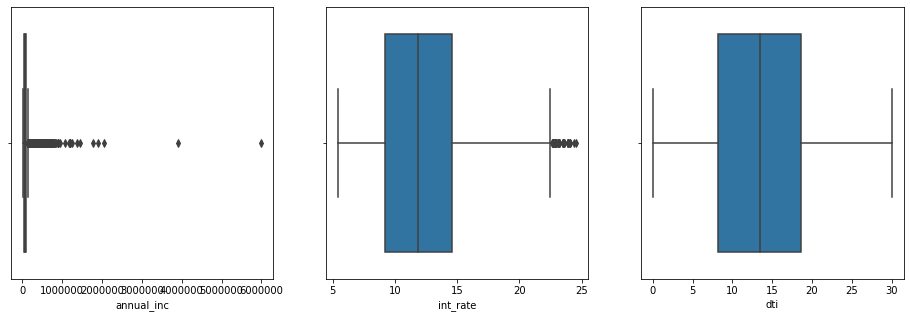

In [16]:
figure, axis = plt.subplots(1, 3, figsize=(16,5))

sns.boxplot(data=loans,x='annual_inc', ax=axis[0])

sns.boxplot(data=loans,x='int_rate', ax=axis[1])

sns.boxplot(data=loans,x='dti', ax=axis[2])

From the plots above, its clear that annual income is very skewed & has outliers.

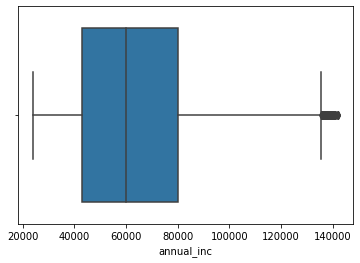

In [17]:
#Removing outliers from annual income, keeping values only between 5 and 95 percentile
inc_range = np.percentile(loans['annual_inc'], [5,95])
loans = loans[(loans.annual_inc > inc_range[0]) & (loans.annual_inc < inc_range[1])]

sns.boxplot(data=loans,x='annual_inc')

In [18]:
#Creating derived variable issue_year & issue_mnth from issue_date
loans['issue_d'] = pd.to_datetime(loans['issue_d'], format='%b-%y')
loans['issue_year'] = pd.to_datetime(loans['issue_d']).dt.year.astype(str)
loans['issue_mnth'] = pd.to_datetime(loans['issue_d']).dt.month

In [19]:
#Check for Missing values
round((loans.isnull().sum()/len(loans))*100,2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 0.00
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
title                      0.03
zip_code                   0.00
addr_state                 0.00
dti                        0.00
open_acc                   0.00
pub_rec                    0.00
total_acc                  0.00
total_pymnt                0.00
total_rec_late_fee         0.00
recoveries                 0.00
collection_recovery_fee    0.00
last_credit_pull_d         0.01
pub_rec_bankruptcies       1.67
issue_year                 0.00
issue_mn

In [20]:
loans.shape

(35523, 32)

In [21]:
#Binning some Continuous Variables to make them categorical
loans['loan_amnt_grp']=pd.cut(loans.loan_amnt,[x for x in range(0, 40000, 4000)])
loans['tot_acc_grp']=pd.cut(loans.total_acc,bins=10,precision=0)
loans['open_acc_grp']=pd.cut(loans.open_acc,bins=10,precision=0)
loans['dti_grp']=pd.cut(loans.dti,bins=10,precision=0)
loans['annual_inc_grp']=pd.cut(loans.annual_inc,[x for x in range(20000, 150000, 10000)])
loans['int_rate_grp']=pd.cut(loans.int_rate,[x for x in range(4, 28, 4)])

## Data Analysis

In [22]:
#Because we have to find deriving factors for defaults or Charge-Offs, we will only be analyzing Closed or Charged-Off accounts
#Creating a new DF closed_loans
closed_loans = loans[loans['loan_status']!='Current']

In [23]:
closed_loans.shape

(34490, 38)

In [24]:
#Getting the most frequent occurence of categorical variable values
ctgy_col = ['grade','sub_grade','home_ownership','verification_status','loan_status','purpose','issue_year']
closed_loans[ctgy_col].describe(include='all').transpose()

,count,unique,top,freq
grade,34490,7,B,10416
sub_grade,34490,35,A4,2588
home_ownership,34490,5,RENT,16441
verification_status,34490,3,Not Verified,15149
loan_status,34490,2,Fully Paid,29499
purpose,34490,14,debt_consolidation,16482
issue_year,34490,5,2011,18444


In [25]:
closed_loans['loan_status'].groupby(closed_loans['loan_status']).count()

loan_status
Charged Off     4991
Fully Paid     29499
Name: loan_status, dtype: int64

### Univariarte Analysis

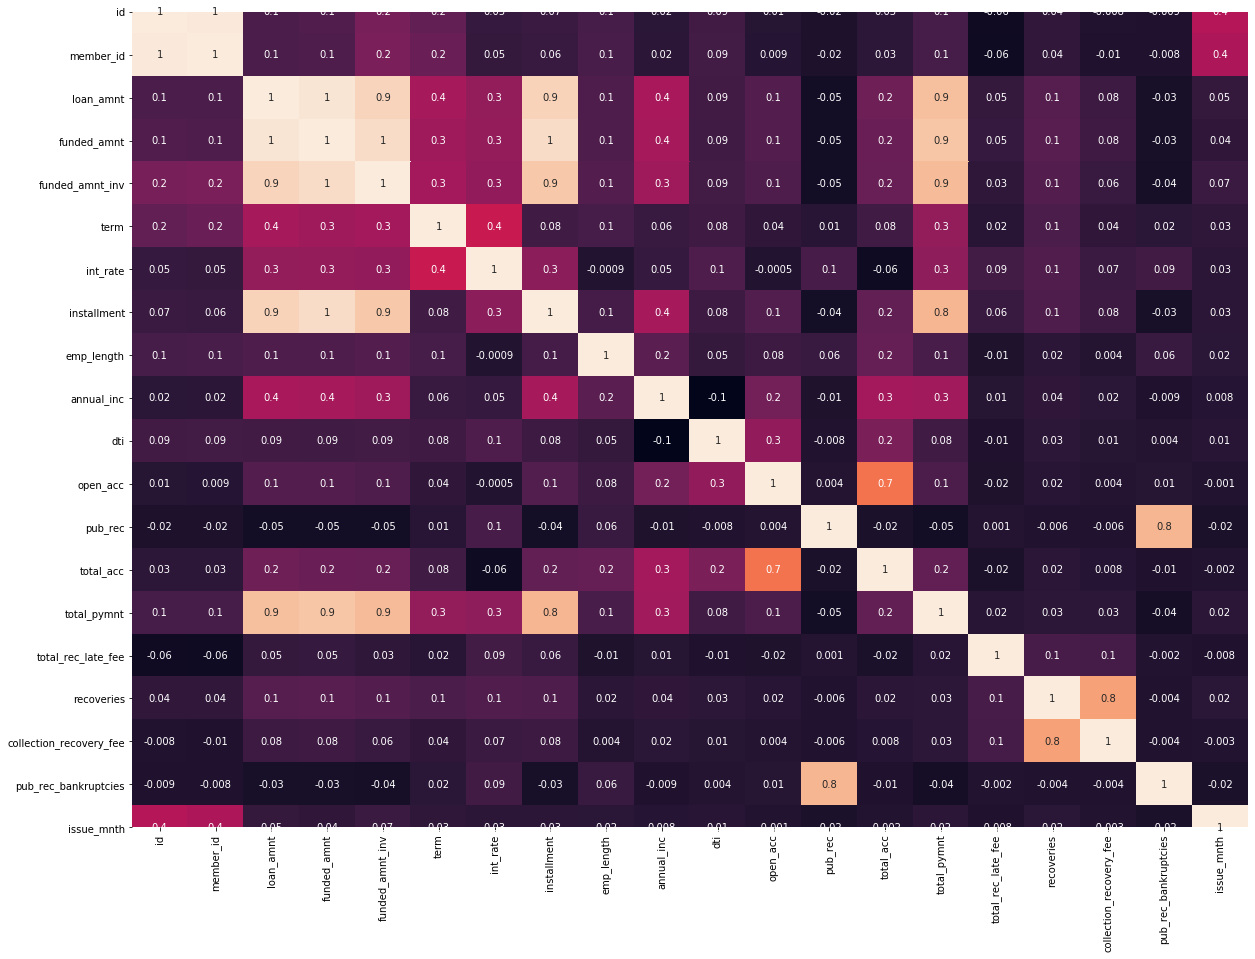

In [26]:
#Checking Correlation for all continuous variables
plt.figure(figsize=(20,15))
sns.heatmap(closed_loans.corr(), cbar=False, fmt='.1g', annot = True)

In [27]:
#Dropping variables which are 100% correlated with eachother and are redundant for analysis
closed_loans = closed_loans.drop(['member_id','funded_amnt', 'installment'],axis=1)

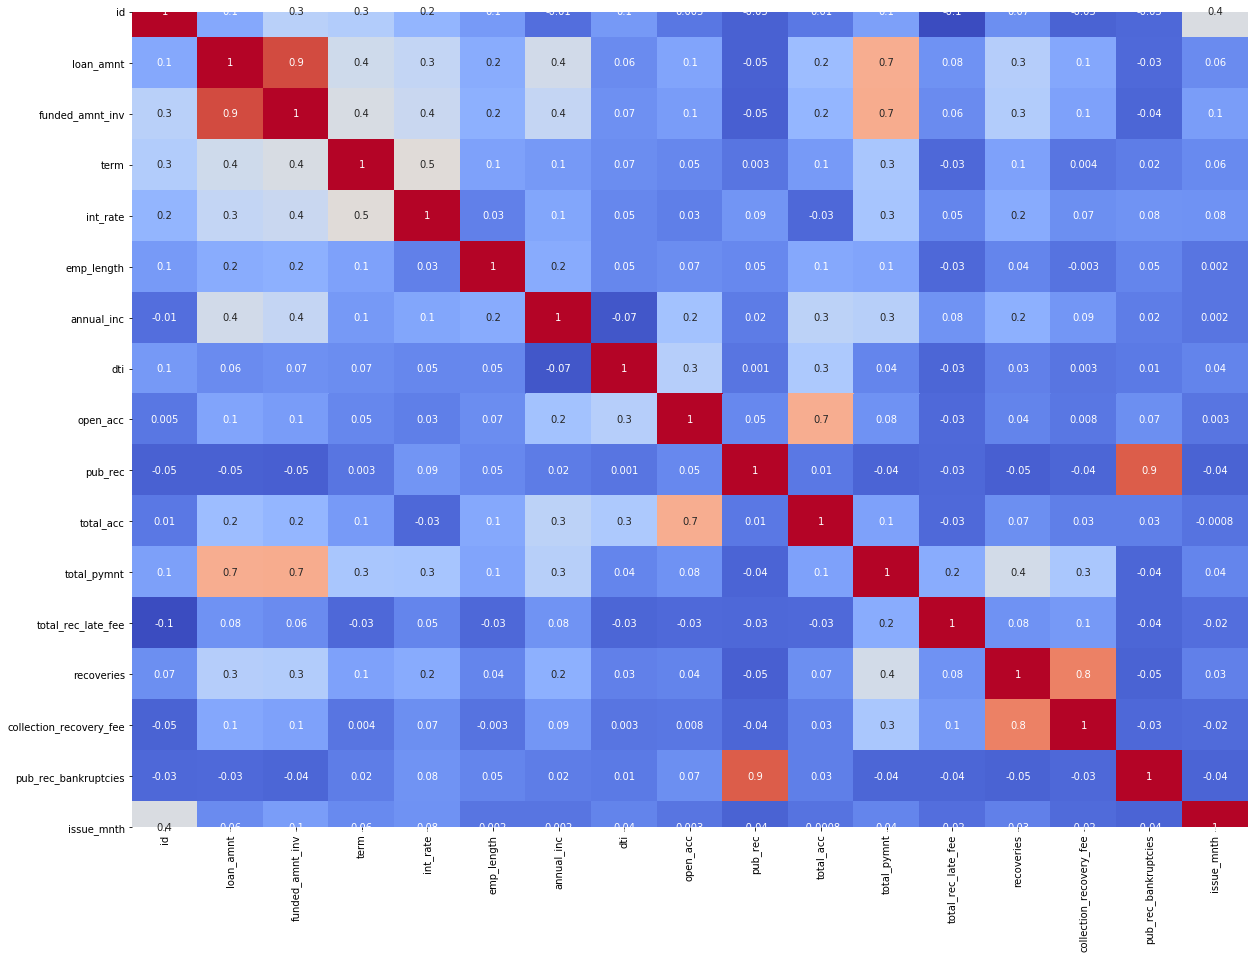

In [28]:
plt.figure(figsize=(20,15))
sns.heatmap(closed_loans[loans['loan_status']=='Charged Off'].corr(), cmap= 'coolwarm', cbar=False, fmt='.1g', annot = True)

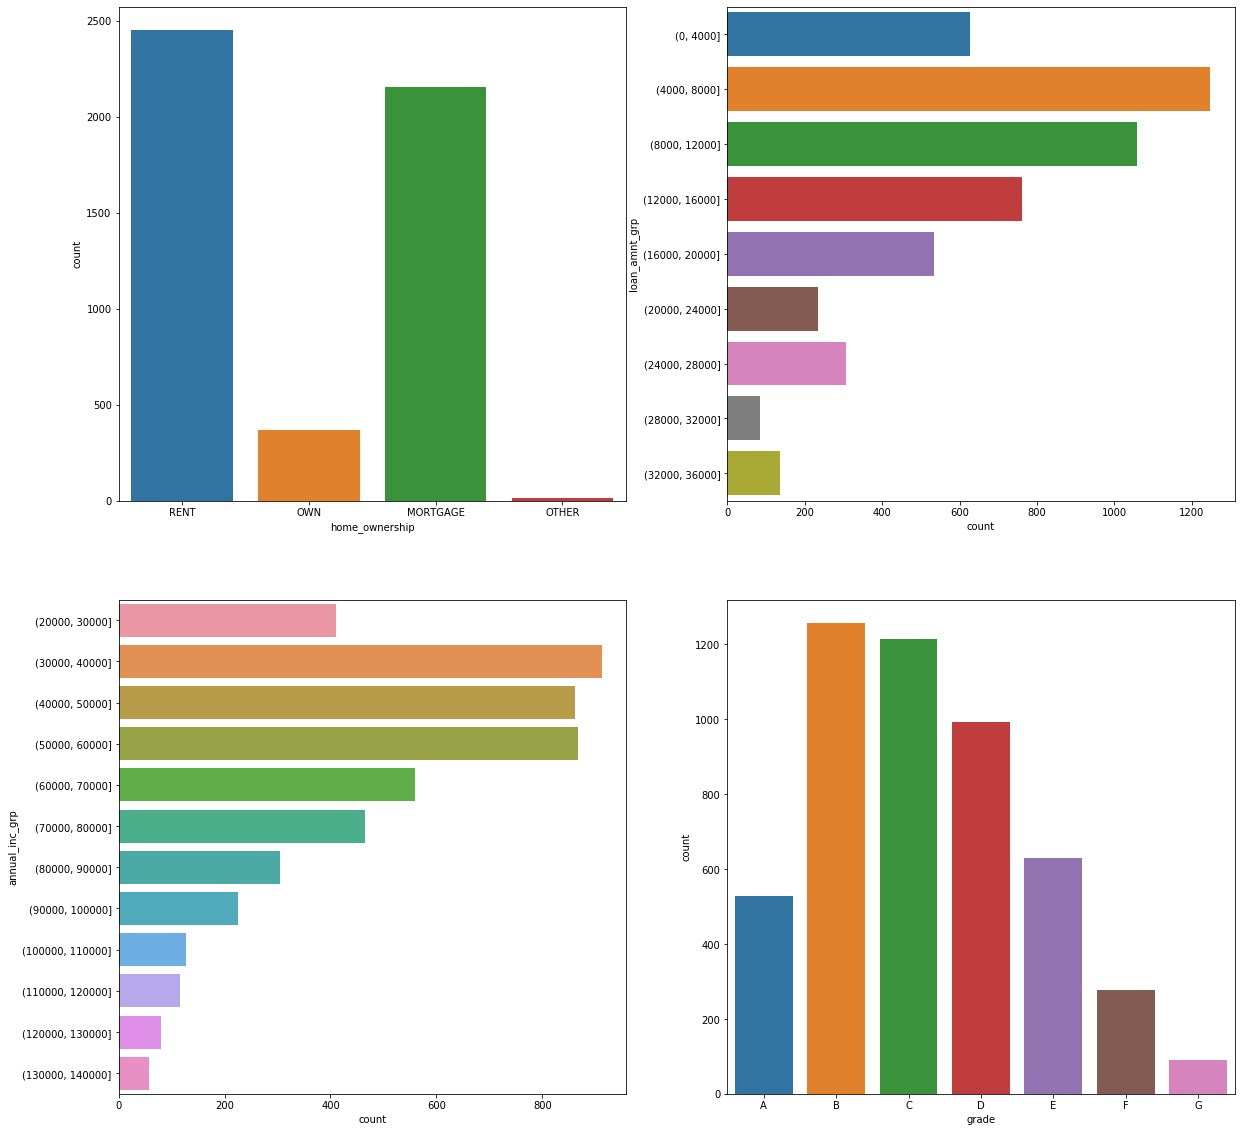

In [29]:
#Plotting distribution of some variables for Charged-Off loans
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.countplot(x='home_ownership', data=closed_loans[loans['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(y='loan_amnt_grp', data=closed_loans[loans['loan_status']=='Charged Off'])
plt.subplot(223)
sns.countplot(y='annual_inc_grp', data=closed_loans[loans['loan_status']=='Charged Off'])
plt.subplot(224)
sns.countplot(x='grade', data=closed_loans[loans['loan_status']=='Charged Off'], order=['A','B','C','D','E','F','G'])
plt.show()

- For home_ownership, customers with status 'RENT' default most followed by 'MORTGAGE'
- For Loan_amnt, customers with loan amount between 5000 & 10000 have highest number of charge-offs
- Customers with annual income in 30-40k default most followed by customers with annual income range of 50-60k & 40-50k
- Customers with loan grade B defaults most, followed by loan grade C

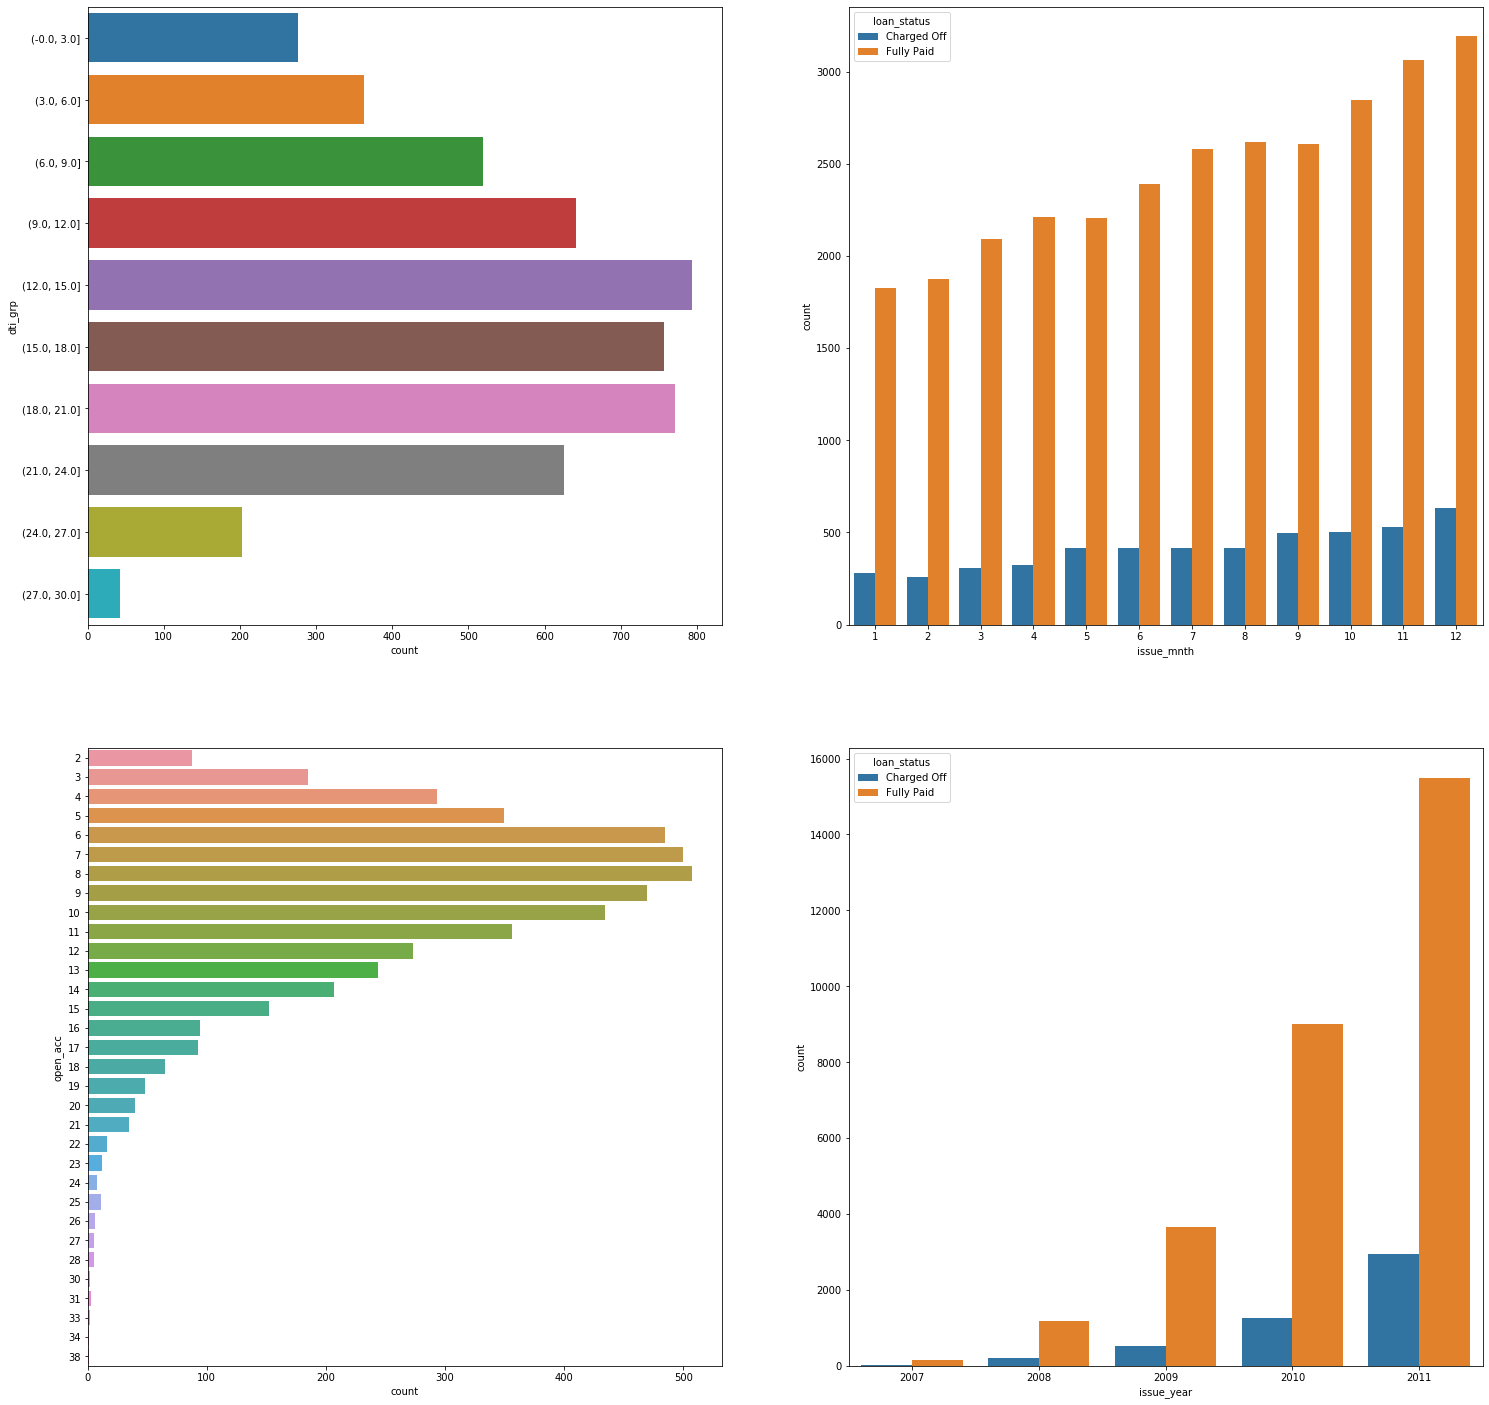

In [30]:
plt.figure(figsize=(25,25))
plt.subplot(221)
sns.countplot(y='dti_grp', data=closed_loans[loans['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_mnth', data=closed_loans, hue='loan_status')
plt.subplot(223)
sns.countplot(y='open_acc', data=closed_loans[loans['loan_status']=='Charged Off'])
plt.subplot(224)
sns.countplot(x='issue_year', data=closed_loans, hue='loan_status')
plt.show()

- Customers with DTI in the range of 12 to 15 tend to Charge-off more compared to other customers
- From the ditribution of Issue_Mnth, maximum number of loans are issued in December followed by November
- From distribution of Open_acc variable, its clear that customers having 6 to 10 current open credit line default more compared to others

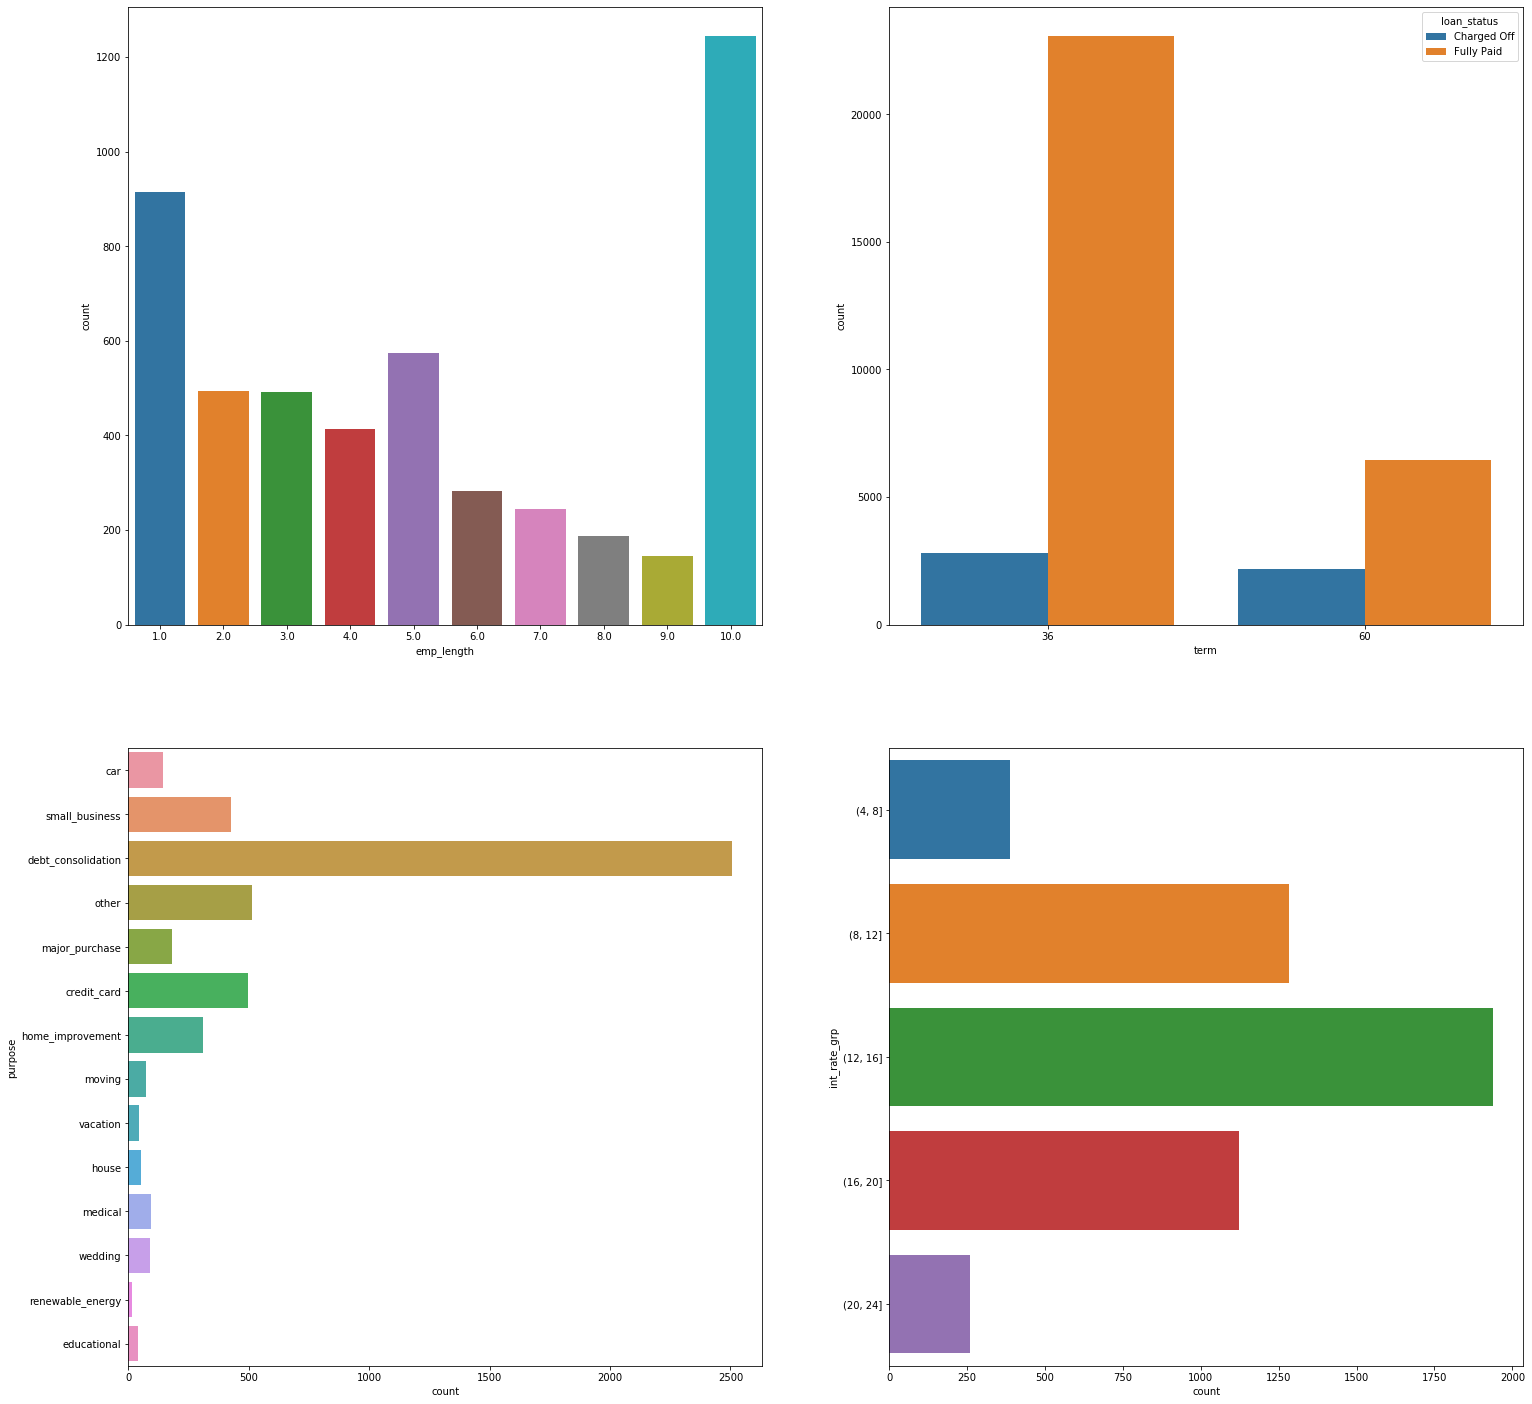

In [31]:
plt.figure(figsize=(25,25))
plt.subplot(221)
sns.countplot(x='emp_length',data=closed_loans[loans['loan_status']=='Charged Off'])

plt.subplot(222)
sns.countplot(x='term',data=closed_loans , hue='loan_status')

plt.subplot(223)
sns.countplot(y='purpose',data=closed_loans[loans['loan_status']=='Charged Off'])

plt.subplot(224)
sns.countplot(y='int_rate_grp',data=closed_loans[loans['loan_status']=='Charged Off'])
plt.show()

- Customers with loan term of 36 months tend to default more than higher term loans
- Customers who take loans to settle their other debts tend to default most 
- Loans issued with interest rate in range of 12% to 16% defaults more compared to other

### BiVariate Analysis

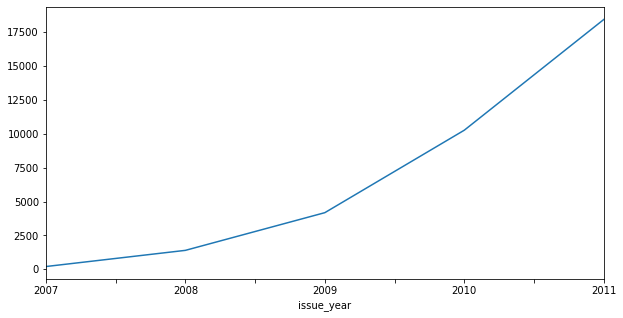

In [32]:
#Loan Amount vs Time
plt.figure(figsize=(10,5))
closed_loans.groupby('issue_year').loan_amnt.count().plot(kind='line')

# Inference : The number of loans and loan amount has been increasing YoY

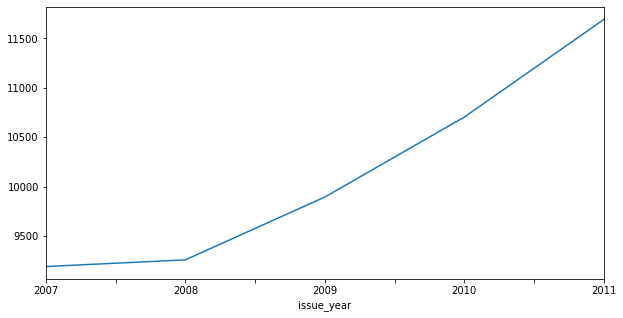

In [33]:
#Average Loan Amount over years
plt.figure(figsize=(10,5))
closed_loans.groupby('issue_year').loan_amnt.mean().plot(kind='line')
plt.show()


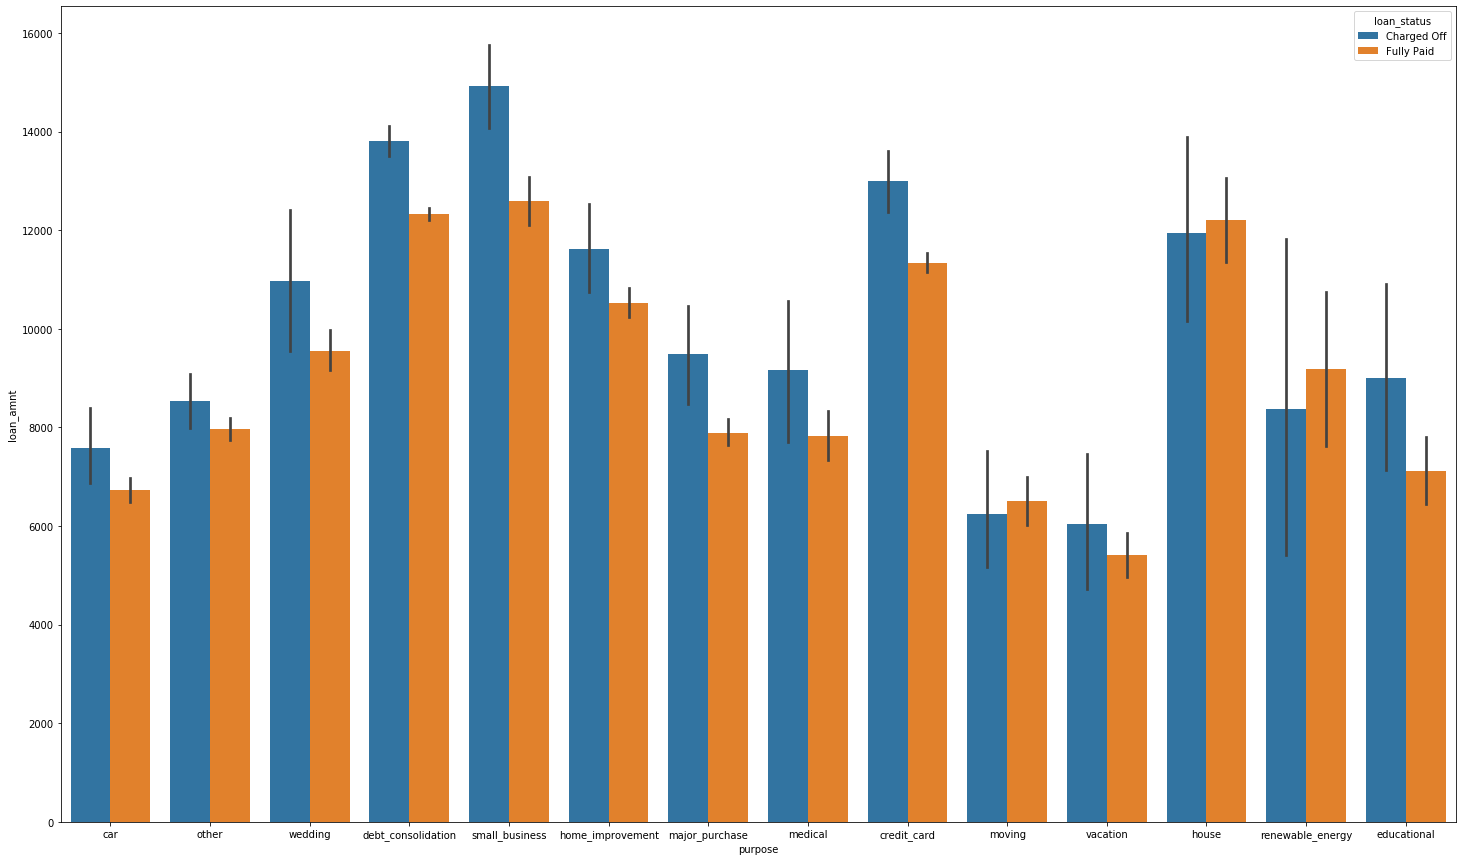

In [34]:
#Purpose of loan vs loan amount
plt.figure(figsize=(25,15))
sns.barplot(data =closed_loans, x='purpose', y='loan_amnt', hue ='loan_status')
plt.show()

#Inference: Customers with high loan amounts for the purpose of small business have high numbers of defaults cmpared to others

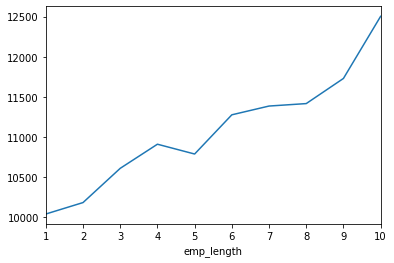

In [35]:
# Employee length vs Avg loan amount
df = closed_loans.groupby('emp_length')['loan_amnt'].mean()
df.plot(kind='line')

#Inference: The average loan amount is more for customers with high employment tenure 

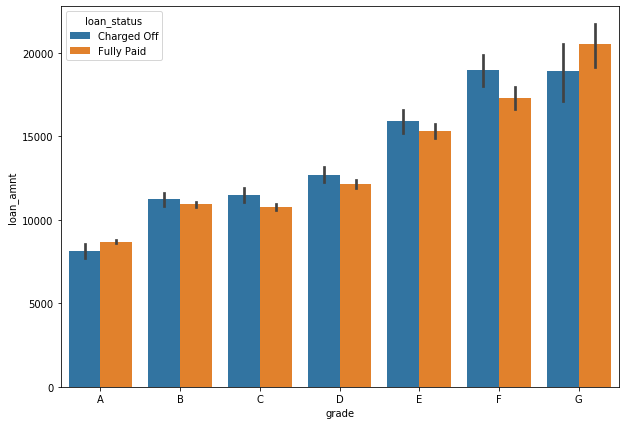

In [36]:
#Loan Amount vs Loan Grade
plt.figure(figsize=(10,7))
sns.barplot(x='grade',y='loan_amnt',hue="loan_status",data=closed_loans, order=['A','B','C','D','E','F','G'])
plt.show()
#Inference : customers with loan grade F & G have higher loan amount & are defaulting more as compared to others

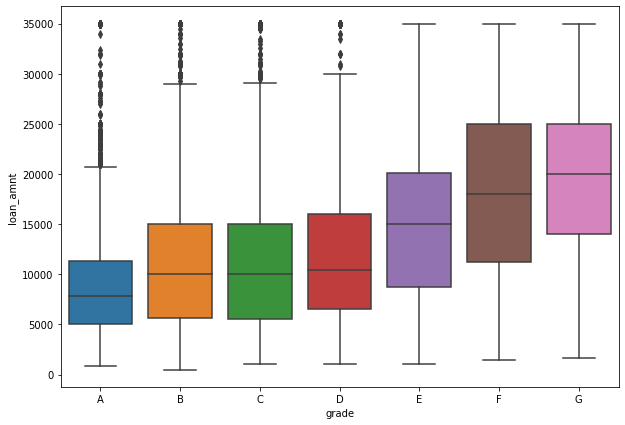

In [37]:
#Loan amount vs Loan Grade
plt.figure(figsize=(10,7))
sns.boxplot(x="grade", y="loan_amnt", data=closed_loans, order=['A','B','C','D','E','F','G'])
plt.show()

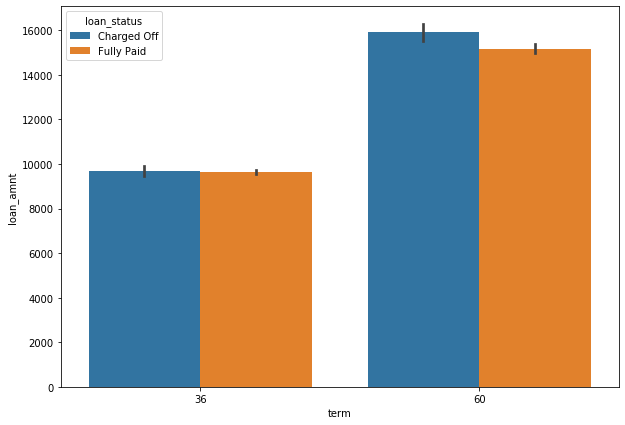

In [38]:
#Loan amount vs term 
plt.figure(figsize=(10,7))
sns.barplot(x='term',y='loan_amnt', hue="loan_status", data=closed_loans)
plt.show()

# Inference : High loan amount taken for longer term have higher charge-offs

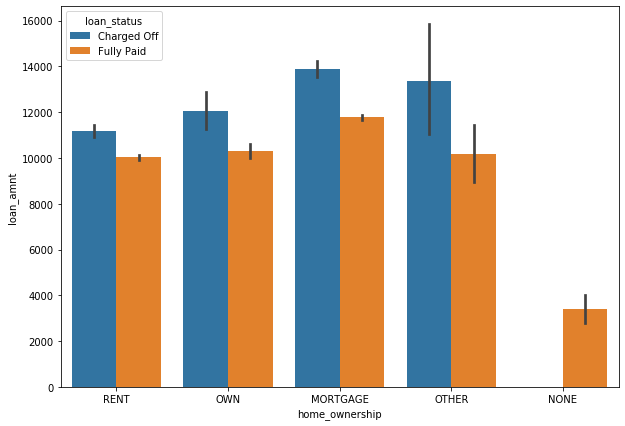

In [39]:
#Loan amount vs home_ownership 
plt.figure(figsize=(10,7))
sns.barplot(x='home_ownership',y='loan_amnt', hue="loan_status", data=closed_loans)
plt.show()

#Inference: Customers with Mortgages and high loan amount tend to default more

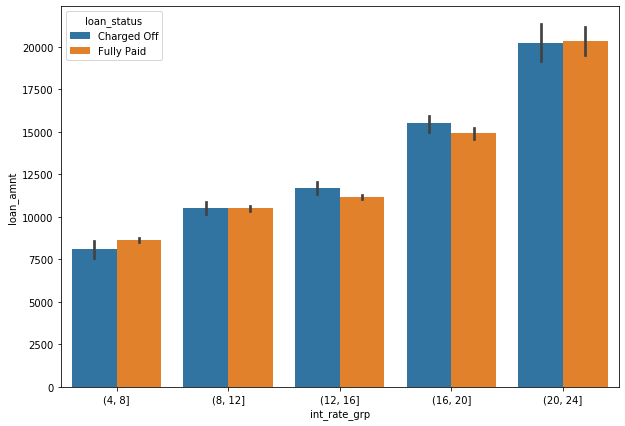

In [40]:
#Loan amount vs home_ownership 
plt.figure(figsize=(10,7))
sns.barplot(x='int_rate_grp',y='loan_amnt', hue="loan_status", data=closed_loans)
plt.show()

#Inference: Loans of higher amount issued with hight interest rates tend to default more

loan_amnt_grp  (0, 4000]  (4000, 8000]  (8000, 12000]  (12000, 16000]  \
loan_status                                                             
Charged Off     0.127052      0.126048        0.13044        0.154017   
Fully Paid      0.872948      0.873952        0.86956        0.845983   

loan_amnt_grp  (16000, 20000]  (20000, 24000]  (24000, 28000]  (28000, 32000]  \
loan_status                                                                     
Charged Off          0.174267        0.196488        0.207177        0.219895   
Fully Paid           0.825733        0.803512        0.792823        0.780105   

loan_amnt_grp  (32000, 36000]  
loan_status                    
Charged Off          0.287212  
Fully Paid           0.712788  
AxesSubplot(0.125,0.125;0.775x0.755)


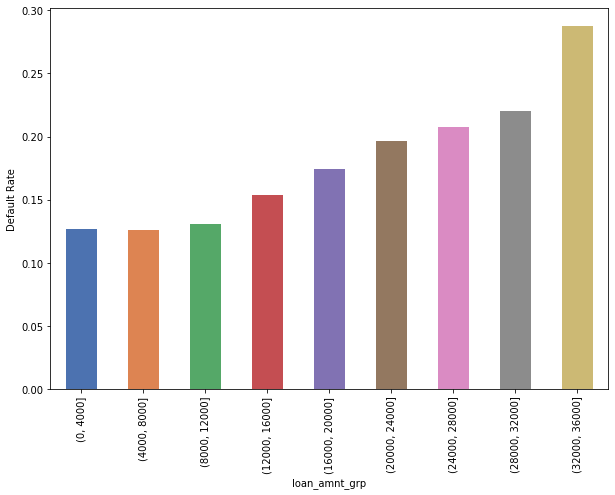

In [41]:
#Ploting Default rate 

def plot_def_rate(df,by,status='Charged Off'):
    group = df.groupby(['loan_status',by])[by].count()
    count = df.groupby(by)[by].count()
    pct = group.unstack()/ count.T
    print(pct)
    plt.figure(figsize=(10,7))
    grph1 = pct.loc[status].plot.bar(color=sns.color_palette('deep',16))
    grph1.set_ylabel('Default Rate')
    print(grph1)
    return grph1

plot_def_rate(closed_loans,'loan_amnt_grp')

- Of all Customers with loan amount 30-35k approx 28% loans have Charged-Off

grade               A        B         C         D         E         F  \
loan_status                                                              
Charged Off  0.058163  0.12068  0.173541  0.219302  0.267091  0.326291   
Fully Paid   0.941837  0.87932  0.826459  0.780698  0.732909  0.673709   

grade               G  
loan_status            
Charged Off  0.354331  
Fully Paid   0.645669  
AxesSubplot(0.125,0.125;0.775x0.755)


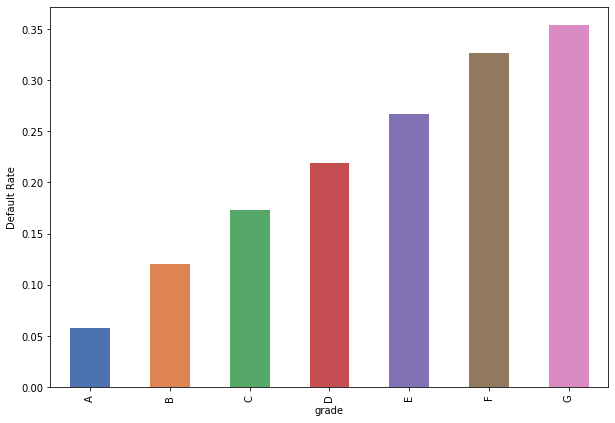

In [42]:
plot_def_rate(closed_loans,'grade')

Loans of loan grade G has highest default rate (>35%) followed by loans of loan grade F

purpose           car  credit_card  debt_consolidation  educational  \
loan_status                                                           
Charged Off  0.107357     0.108179            0.152105     0.171548   
Fully Paid   0.892643     0.891821            0.847895     0.828452   

purpose      home_improvement     house  major_purchase   medical    moving  \
loan_status                                                                   
Charged Off          0.124848  0.164087        0.097639  0.155259  0.156118   
Fully Paid           0.875152  0.835913        0.902361  0.844741  0.843882   

purpose         other  renewable_energy  small_business  vacation   wedding  
loan_status                                                                  
Charged Off  0.155872          0.185185        0.278103  0.139394  0.103129  
Fully Paid   0.844128          0.814815        0.721897  0.860606  0.896871  
AxesSubplot(0.125,0.125;0.775x0.755)


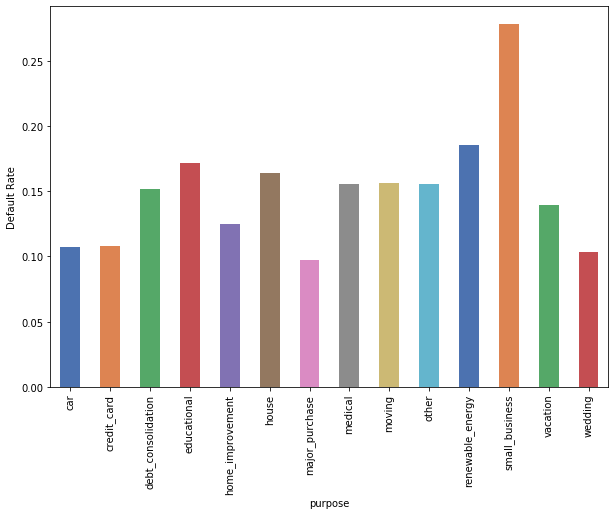

In [43]:
plot_def_rate(closed_loans,'purpose')

Loans for the purpose of SMALL BUSINESS have highest default rate

annual_inc_grp  (20000, 30000]  (30000, 40000]  (40000, 50000]  \
loan_status                                                      
Charged Off           0.173362        0.177191        0.151467   
Fully Paid            0.826638        0.822809        0.848533   

annual_inc_grp  (50000, 60000]  (60000, 70000]  (70000, 80000]  \
loan_status                                                      
Charged Off           0.155599        0.136475        0.131915   
Fully Paid            0.844401        0.863525        0.868085   

annual_inc_grp  (80000, 90000]  (90000, 100000]  (100000, 110000]  \
loan_status                                                         
Charged Off           0.121514         0.112774          0.104065   
Fully Paid            0.878486         0.887226          0.895935   

annual_inc_grp  (110000, 120000]  (120000, 130000]  (130000, 140000]  
loan_status                                                           
Charged Off             0.105647          0.109439 

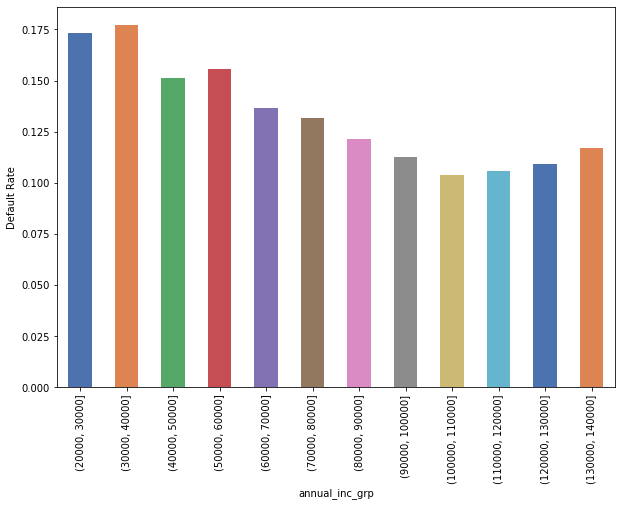

In [44]:
plot_def_rate(closed_loans,'annual_inc_grp')

Loans issued to customers with low annual income (less than 40k USD) have high default rates compared to others

home_ownership  MORTGAGE  NONE     OTHER       OWN      RENT
loan_status                                                 
Charged Off     0.139219   NaN  0.193182  0.148372  0.149079
Fully Paid      0.860781   1.0  0.806818  0.851628  0.850921
AxesSubplot(0.125,0.125;0.775x0.755)


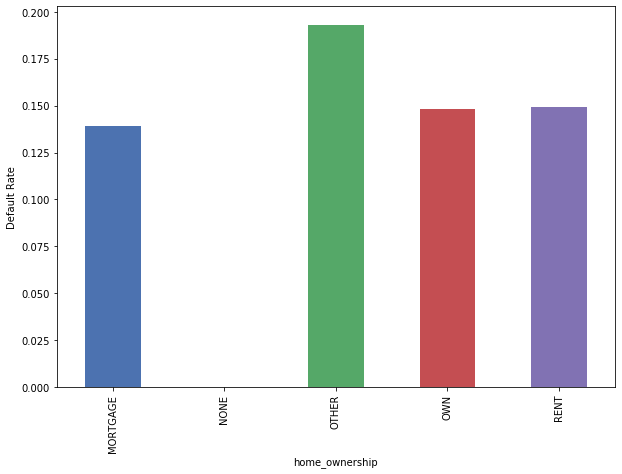

In [45]:
plot_def_rate(closed_loans,'home_ownership')

addr_state         AK      AL        AR        AZ        CA        CO  \
loan_status                                                             
Charged Off  0.185714  0.1225  0.093023  0.133333  0.162779  0.126255   
Fully Paid   0.814286  0.8775  0.906977  0.866667  0.837221  0.873745   

addr_state         CT        DC        DE        FL  ...        SD        TN  \
loan_status                                          ...                       
Charged Off  0.137072  0.063158  0.111111  0.179665  ...  0.192982  0.133333   
Fully Paid   0.862928  0.936842  0.888889  0.820335  ...  0.807018  0.866667   

addr_state         TX        UT        VA        VT        WA        WI  \
loan_status                                                               
Charged Off  0.115237  0.162281  0.131579  0.102041  0.155007  0.143223   
Fully Paid   0.884763  0.837719  0.868421  0.897959  0.844993  0.856777   

addr_state         WV        WY  
loan_status                      
Charged Off  0.13

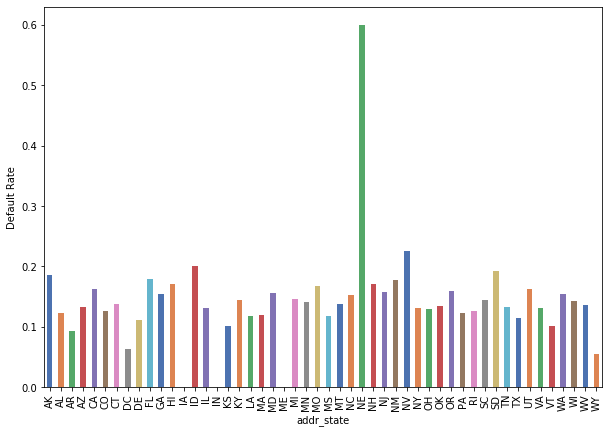

In [46]:
plot_def_rate(closed_loans,'addr_state')

Customers from Nebraska (NE) and Nevada (NV) have highest default rates among all states

int_rate_grp   (4, 8]   (8, 12]  (12, 16]  (16, 20]  (20, 24]
loan_status                                                  
Charged Off   0.05206  0.115495  0.173687  0.272264   0.39542
Fully Paid    0.94794  0.884505  0.826313  0.727736   0.60458
AxesSubplot(0.125,0.125;0.775x0.755)


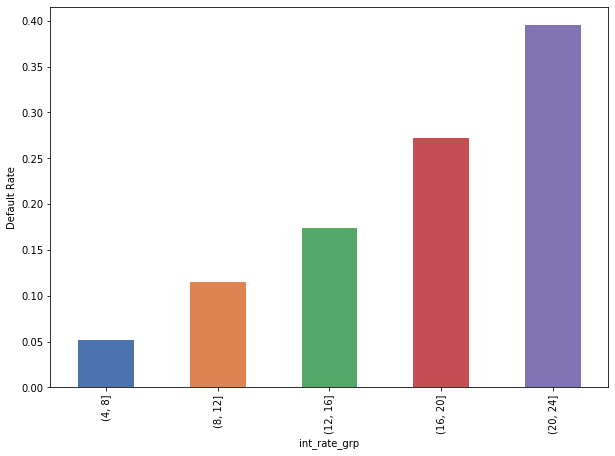

In [47]:
plot_def_rate(closed_loans,'int_rate_grp')

Customers having loans at high interest rates have high default rate

End of File